In [4]:
pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [5]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# divide dataset into dependent and independent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [14]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [15]:
## concatenate these variables with dataframe
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [13]:
#pd.get_dummies(X['Geography'],drop_first=True)


,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [19]:
X=pd.concat([X, geography, gender], axis=1)

In [20]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [21]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [24]:
## Part 2 lets create an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [25]:
# lets initialize the ANN
classifier = Sequential()

In [26]:
## Adding the first input layer
classifier.add(Dense(units=11, activation='relu'))

In [27]:
## Adding first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [29]:
## adding second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [30]:
## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [33]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001)


In [34]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6763 - loss: 0.6124 - val_accuracy: 0.7955 - val_loss: 0.4719
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8077 - loss: 0.4459 - val_accuracy: 0.8103 - val_loss: 0.4230
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8218 - loss: 0.4101 - val_accuracy: 0.8239 - val_loss: 0.3995
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8348 - loss: 0.3934 - val_accuracy: 0.8360 - val_loss: 0.3833
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8483 - loss: 0.3669 - val_accuracy: 0.8410 - val_loss: 0.3759
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8517 - loss: 0.3618 - val_accuracy: 0.8383 - val_loss: 0.3729
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8614 - loss: 0.3363 - val_accuracy: 0.8417 - val_loss: 0.3706
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8566 - loss: 0.3395 - val_accu

In [35]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
model_history.history.values()

dict_values([[0.7641351222991943, 0.8119052052497864, 0.8255271315574646, 0.8413883447647095, 0.8503451943397522, 0.8550102710723877, 0.8583691120147705, 0.8572494983673096, 0.8585556745529175, 0.8583691120147705, 0.8630341291427612, 0.863220751285553, 0.8609815239906311, 0.8598619103431702, 0.8611681461334229, 0.8628475666046143, 0.8619145154953003, 0.8643403649330139, 0.8626609444618225, 0.8600485324859619, 0.8641537427902222, 0.8619145154953003, 0.8635939359664917, 0.8639671802520752, 0.8656466007232666, 0.8634073734283447, 0.8634073734283447, 0.863220751285553, 0.8635939359664917, 0.863220751285553, 0.8628475666046143, 0.8649001717567444, 0.8604217171669006, 0.8652733564376831, 0.8641537427902222, 0.8639671802520752, 0.8641537427902222, 0.8665795922279358, 0.8647135496139526, 0.8652733564376831, 0.8634073734283447, 0.8652733564376831, 0.8652733564376831, 0.866392970085144, 0.8660197854042053, 0.8652733564376831, 0.866392970085144, 0.8649001717567444, 0.8654599785804749, 0.866206407

In [37]:
## Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=20, verbose=1, mode='auto',baseline=None, restore_best_weights=False)

In [38]:
model_history2 = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100,callbacks=[early_stopping])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8734 - loss: 0.3025 - val_accuracy: 0.8482 - val_loss: 0.3641
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8677 - loss: 0.3126 - val_accuracy: 0.8482 - val_loss: 0.3645
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8633 - loss: 0.3192 - val_accuracy: 0.8489 - val_loss: 0.3629
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8711 - loss: 0.3201 - val_accuracy: 0.8451 - val_loss: 0.3683
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8728 - loss: 0.3105 - val_accuracy: 0.8478 - val_loss: 0.3658
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8743 - loss: 0.3136 - val_accuracy: 0.8497 - val_loss: 0.3664
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8702 - loss: 0.3237 - val_accuracy: 0.8493 - val_loss: 0.3647
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8664 - loss: 0.3170 - val_accu

In [39]:
model_history2.history.keys()
#

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

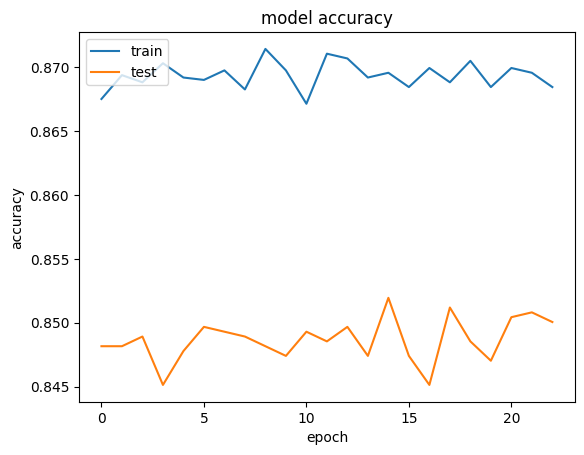

In [41]:
# summary for history for accuracy
plt.plot(model_history2.history['accuracy'])
plt.plot(model_history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

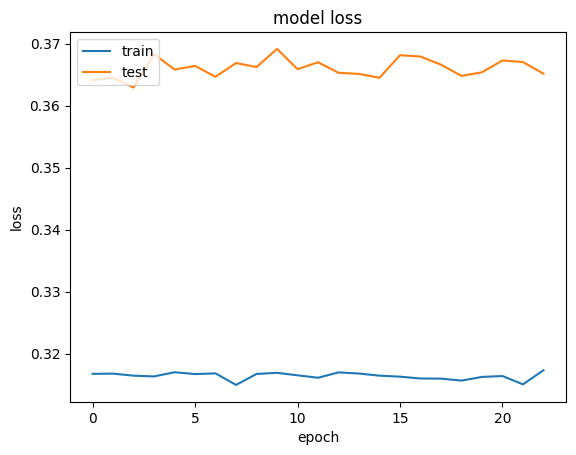

In [42]:
# summarize history for loss
plt.plot(model_history2.history['loss'])
plt.plot  (model_history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [43]:
#Part 3 making  predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [44]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1508,   87],
       [ 207,  198]])

In [45]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.853

In [47]:
# get the weights
classifier.get_weights()

[array([[-1.32954970e-01, -1.24687731e-01,  4.54511970e-01,
          9.44833010e-02,  8.52097664e-03,  7.06955791e-02,
          1.98460072e-01, -3.15425664e-01, -6.02752157e-02,
          6.67527080e-01, -4.16090861e-02],
        [ 8.98463666e-01, -8.07251930e-01,  5.39155245e-01,
          7.00652480e-01,  8.87579620e-02,  4.41384822e-01,
         -3.02011251e-01, -2.06223154e-03,  7.09058762e-01,
         -1.54049769e-01, -8.16839278e-01],
        [-3.10907096e-01,  2.49097601e-01, -7.11933151e-02,
         -8.97675157e-02,  2.62760371e-02, -2.65219688e-01,
         -5.74982882e-01,  3.54767829e-01, -1.10797279e-01,
         -3.10856611e-01, -1.57694235e-01],
        [ 7.64036715e-01, -2.40629971e-01, -1.44345665e+00,
         -2.48057172e-01,  4.70030993e-01, -8.37422013e-01,
         -2.45126233e-01,  2.93534482e-03, -3.39632221e-02,
         -6.09942257e-01,  9.84741271e-01],
        [-3.63561988e-01, -5.49431443e-01,  1.45047950e-02,
          1.12144065e+00, -7.83861458e-01, -